In [76]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [1]:
!set PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True

In [2]:
#THis code is to check if the video is corrupted or not..
#If the video is corrupted delete the video.
import glob
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
# import face_recognition

def validate_video(vid_path,train_transforms):
      transform = train_transforms
      count = 20
      video_path = vid_path
      frames = []
      for i,frame in enumerate(frame_extract(video_path)):
        frames.append(transform(frame))
        if(len(frames) == count):
          break
      frames = torch.stack(frames)    # list of tensors --> single tensor
      frames = frames[:count]
      return frames


def frame_extract(path):
  vidObj = cv2.VideoCapture(path)
  success = 1
  while success:
      success, image = vidObj.read()
      if success:
          yield image

im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

video_fil =  glob.glob('dataset/face_only_celeb_fake/*.mp4')
video_fil += glob.glob('dataset/face_only_celeb_real/*.mp4')


In [3]:
video_fil[0]

'dataset/face_only_celeb_fake\\id0_id16_0006.mp4'

In [4]:
def replace_backslashes_with_forward_slashes(file_paths):
    updated_paths = []
    for path in file_paths:
        updated_path = path.replace("\\", "/")
        updated_paths.append(updated_path)
    return updated_paths

video_fil = replace_backslashes_with_forward_slashes(video_fil)

In [5]:
video_fil[0]

'dataset/face_only_celeb_fake/id0_id16_0006.mp4'

In [6]:
print("Total no of videos :" , len(video_fil))
# print(video_fil)
count = 0;
for i in video_fil:
  try:
    count+=1
    validate_video(i,train_transforms)
  except:
    print("Number of video processed: " , count ," Remaining : " , (len(video_fil) - count))
    print("Corrupted video is : " , i)
    # os.remove(i)
    print("file removed")
    continue
    
print("done")

Total no of videos : 1174
done


In [7]:
len(video_fil)

1174

In [8]:
import json
import glob
import numpy as np
import cv2
import copy
import random

video_files =  glob.glob('dataset/face_only_celeb_real/*.mp4')
video_files += glob.glob('dataset/face_only_celeb_fake/*.mp4')

random.shuffle(video_files)
random.shuffle(video_files)

frame_count = []

for video_file in video_files:
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<100):
    video_files.remove(video_file)
    print(f'{video_file} removed')
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))

print("Total no of video: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))

Total no of video:  1174
Average frame per video: 147.9480408858603


In [9]:
video_files[0].split('\\')[-1]

'id17_id21_0000.mp4'

In [10]:
# load the video name and labels from csv
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

class video_dataset(Dataset):
    def __init__(self,video_names,labels,sequence_length = 60,transform = None):
        self.video_names = video_names
        self.labels = labels
        self.transform = transform
        self.count = sequence_length
        
    def __len__(self):
        return len(self.video_names)
    
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = []
        temp_video = video_path.split('\\')[-1]
        label = self.labels.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
        if(label == 'FAKE'):
          label = 0
        if(label == 'REAL'):
          label = 1
        
        for i,frame in enumerate(self.frame_extract(video_path)):
          frames.append(self.transform(frame))
          if(len(frames) == self.count):
            break
            
        frames = torch.stack(frames)
        frames = frames[:self.count]
       
        return frames,label
    
    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path)
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image
                
#plot the image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1,2,0)
    b,g,r = cv2.split(image) 
    image = cv2.merge((r,g,b))
    image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
    image = image*255.0
    plt.imshow(image.astype(int))
    plt.show()

In [11]:
video_files

['dataset/face_only_celeb_fake\\id17_id21_0000.mp4',
 'dataset/face_only_celeb_fake\\id6_id2_0000.mp4',
 'dataset/face_only_celeb_fake\\id20_id25_0006.mp4',
 'dataset/face_only_celeb_real\\id16_0001.mp4',
 'dataset/face_only_celeb_real\\id48_0008.mp4',
 'dataset/face_only_celeb_real\\id19_0001.mp4',
 'dataset/face_only_celeb_fake\\id6_id17_0006.mp4',
 'dataset/face_only_celeb_real\\id10_0006.mp4',
 'dataset/face_only_celeb_real\\id38_0005.mp4',
 'dataset/face_only_celeb_fake\\id16_id23_0005.mp4',
 'dataset/face_only_celeb_fake\\id31_id30_0001.mp4',
 'dataset/face_only_celeb_fake\\id9_id3_0002.mp4',
 'dataset/face_only_celeb_fake\\id29_id32_0007.mp4',
 'dataset/face_only_celeb_real\\id19_0006.mp4',
 'dataset/face_only_celeb_real\\id13_0007.mp4',
 'dataset/face_only_celeb_fake\\id23_id16_0000.mp4',
 'dataset/face_only_celeb_fake\\id32_id23_0006.mp4',
 'dataset/face_only_celeb_real\\id17_0002.mp4',
 'dataset/face_only_celeb_real\\id26_0007.mp4',
 'dataset/face_only_celeb_real\\id7_0002.mp

In [12]:
#count the number of fake and real videos
def number_of_real_and_fake_videos(data_list):
  header_list = ["file","label"]
  lab = pd.read_csv('metadata.csv',names=header_list)
  fake = 0
  real = 0
  for i in data_list:
    temp_video = i.split('\\')[-1]
    label = lab.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
    if(label == 'FAKE'):
      fake+=1
    if(label == 'REAL'):
      real+=1
  return real,fake

In [13]:
# load the labels and video in data loader
import random
import pandas as pd

header_list = ["file","label"]
labels = pd.read_csv('metadata.csv',names=header_list)
#print(labels)

train_videos = video_files[:int(0.8*len(video_files))]
valid_videos = video_files[int(0.8*len(video_files)):]

print("train : " , len(train_videos))
print("test : " , len(valid_videos))


train :  939
test :  235


In [14]:
labels

,file,label
0,id0_0000.mp4,REAL
1,id0_0001.mp4,REAL
2,id0_0002.mp4,REAL
3,id0_0003.mp4,REAL
4,id0_0004.mp4,REAL
...,...,...
1173,id9_id26_0007.mp4,FAKE
1174,id9_id26_0008.mp4,FAKE
1175,id9_id2_0002.mp4,FAKE
1176,id9_id30_0006.mp4,FAKE


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


TRAIN:  Real: 461  Fake: 478
TEST:  Real: 126  Fake: 109


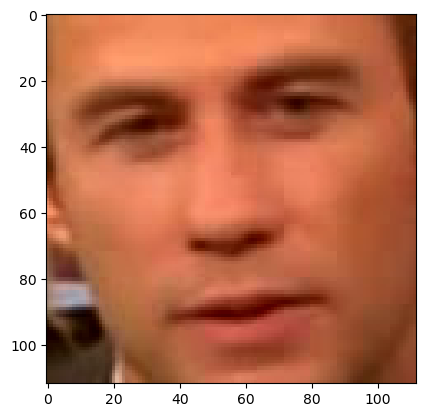

0


In [15]:
# train_videos,valid_videos = train_test_split(data,test_size = 0.2)
# print(train_videos)

print("TRAIN: ", "Real:",number_of_real_and_fake_videos(train_videos)[0]," Fake:",number_of_real_and_fake_videos(train_videos)[1])
print("TEST: ", "Real:",number_of_real_and_fake_videos(valid_videos)[0]," Fake:",number_of_real_and_fake_videos(valid_videos)[1])


im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

test_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

train_data = video_dataset(train_videos,labels,sequence_length = 10,transform = train_transforms)
#print(train_data)
val_data = video_dataset(valid_videos,labels,sequence_length = 10,transform = train_transforms)

train_loader = DataLoader(train_data,batch_size = 4,shuffle = True)
valid_loader = DataLoader(val_data,batch_size = 4,shuffle = True)

image,label = train_data[0]
im_plot(image[0,:,:,:])
print(label)


In [16]:
#Model with feature visualization
from torch import nn
from torchvision import models
class Model(nn.Module):
    def __init__(self, num_classes,latent_dim= 2048, lstm_layers=1 , hidden_dim = 2048, bidirectional = False):
        super(Model, self).__init__()
        model = models.resnext50_32x4d(pretrained = True) #Residual Network CNN
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(latent_dim,hidden_dim, lstm_layers,  bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(2048,num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
    def forward(self, x):
        batch_size,seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size,seq_length,2048)
        x_lstm,_ = self.lstm(x,None)
        return fmap,self.dp(self.linear1(torch.mean(x_lstm,dim = 1)))

In [17]:
model = Model(2).cuda()
a,b = model(torch.from_numpy(np.empty((1,20,3,112,112))).type(torch.cuda.FloatTensor))

C:\Users\vidit\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\vidit\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [18]:
torch.__version__

'2.2.0+cu118'

In [19]:
import torch
from torch.autograd import Variable
import time
import os
import sys
import os

def train_epoch(epoch, num_epochs, data_loader, model, criterion, optimizer):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    t = []
    for i, (inputs, targets) in enumerate(data_loader):
        if torch.cuda.is_available():
            targets = targets.type(torch.cuda.LongTensor)
            inputs = inputs.cuda()
        _,outputs = model(inputs)
        loss  = criterion(outputs,targets.type(torch.cuda.LongTensor))
        acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sys.stdout.write(
                "\r[Epoch %d/%d] [Batch %d / %d] [Loss: %f, Acc: %.2f%%]"
                % (
                    epoch,
                    num_epochs,
                    i,
                    len(data_loader),
                    losses.avg,
                    accuracies.avg))
    torch.save(model.state_dict(),'checkpoint_final.pt')
    return losses.avg,accuracies.avg

def test(epoch,model, data_loader ,criterion):
    print('Testing')
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    pred = []
    true = []
    count = 0
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(data_loader):
            if torch.cuda.is_available():
                targets = targets.cuda().type(torch.cuda.FloatTensor)
                inputs = inputs.cuda()
            _,outputs = model(inputs)
            loss = torch.mean(criterion(outputs, targets.type(torch.cuda.LongTensor)))
            acc = calculate_accuracy(outputs,targets.type(torch.cuda.LongTensor))
            _,p = torch.max(outputs,1) 
            true += (targets.type(torch.cuda.LongTensor)).detach().cpu().numpy().reshape(len(targets)).tolist()
            pred += p.detach().cpu().numpy().reshape(len(p)).tolist()
            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))
            sys.stdout.write(
                    "\r[Batch %d / %d]  [Loss: %f, Acc: %.2f%%]"
                    % (
                        i,
                        len(data_loader),
                        losses.avg,
                        accuracies.avg
                        )
                    )
        print('\nAccuracy {}'.format(accuracies.avg))
    return true,pred,losses.avg,accuracies.avg

class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
        
def calculate_accuracy(outputs, targets):
    batch_size = targets.size(0)

    _, pred = outputs.topk(1, 1, True)
    pred = pred.t()
    correct = pred.eq(targets.view(1, -1))
    n_correct_elems = correct.float().sum().item()
    return 100* n_correct_elems / batch_size

In [20]:
def plot_loss(train_loss_avg,test_loss_avg,num_epochs):
  loss_train = train_loss_avg
  loss_val = test_loss_avg
  print(num_epochs)
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

def plot_accuracy(train_accuracy,test_accuracy,num_epochs):
  loss_train = train_accuracy
  loss_val = test_accuracy
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training accuracy')
  plt.plot(epochs, loss_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

In [21]:
from sklearn.metrics import confusion_matrix
#learning rate
lr = 1e-5 # 0.001

num_epochs = 50

optimizer = torch.optim.Adam(model.parameters(), lr= lr,weight_decay = 1e-5)

criterion = nn.CrossEntropyLoss().cuda()
train_loss_avg =[]
train_accuracy = []
test_loss_avg = []
test_accuracy = []

for epoch in range(1,num_epochs+1):
    l, acc = train_epoch(epoch,num_epochs,train_loader,model,criterion,optimizer)
    train_loss_avg.append(l)
    train_accuracy.append(acc)
    true,pred,tl,t_acc = test(epoch,model,valid_loader,criterion)
    test_loss_avg.append(tl)
    test_accuracy.append(t_acc)
    
plot_loss(train_loss_avg,test_loss_avg,len(train_loss_avg))
plot_accuracy(train_accuracy,test_accuracy,len(train_accuracy))


[Epoch 1/50] [Batch 234 / 235] [Loss: 0.691100, Acc: 54.53%]Testing
[Batch 58 / 59]  [Loss: 0.617589, Acc: 71.49%]
Accuracy 71.48936170212765
[Epoch 2/50] [Batch 234 / 235] [Loss: 0.574917, Acc: 71.14%]Testing
[Batch 58 / 59]  [Loss: 0.505664, Acc: 75.74%]
Accuracy 75.74468085106383
[Epoch 3/50] [Batch 234 / 235] [Loss: 0.456871, Acc: 83.17%]Testing
[Batch 58 / 59]  [Loss: 0.456880, Acc: 80.43%]
Accuracy 80.42553191489361
[Epoch 4/50] [Batch 234 / 235] [Loss: 0.426056, Acc: 85.20%]Testing
[Batch 58 / 59]  [Loss: 0.401182, Acc: 82.13%]
Accuracy 82.12765957446808
[Epoch 5/50] [Batch 234 / 235] [Loss: 0.382307, Acc: 87.01%]Testing
[Batch 58 / 59]  [Loss: 0.417596, Acc: 82.55%]
Accuracy 82.55319148936171
[Epoch 6/50] [Batch 234 / 235] [Loss: 0.351474, Acc: 87.43%]Testing
[Batch 58 / 59]  [Loss: 0.431208, Acc: 82.13%]
Accuracy 82.12765957446808
[Epoch 7/50] [Batch 234 / 235] [Loss: 0.391583, Acc: 87.54%]Testing
[Batch 58 / 59]  [Loss: 0.372737, Acc: 83.83%]
Accuracy 83.82978723404256
[Epoch

KeyboardInterrupt: 

12


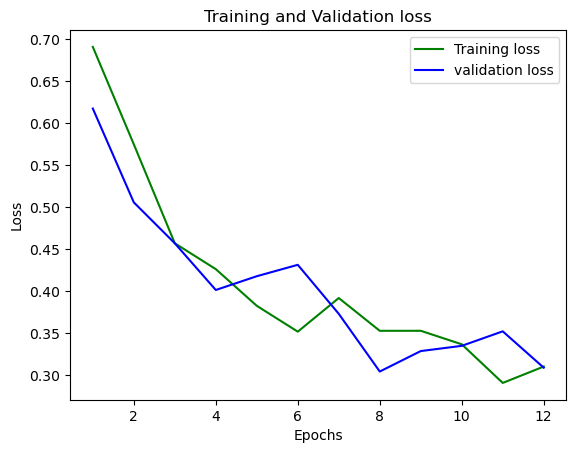

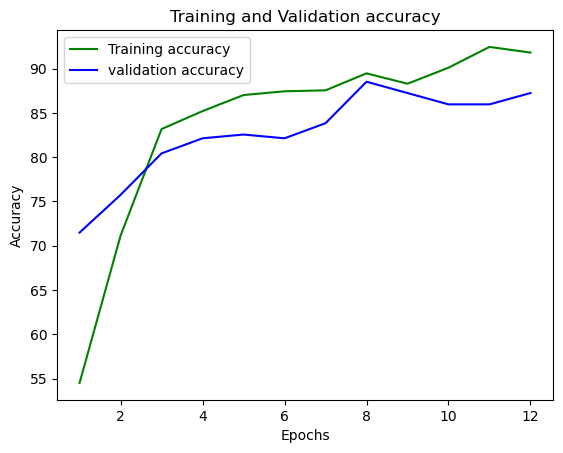

In [25]:
plot_loss(train_loss_avg,test_loss_avg,len(train_loss_avg))
plot_accuracy(train_accuracy,test_accuracy,len(train_accuracy))

In [ ]:
torch.cuda.empty_cache()